In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

print("Training Dataset")
train_data.head()

Training Dataset


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
print("Testing Dataset")
test_data

Testing Dataset


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [4]:
#Training Data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
Unnamed: 0               1296675 non-null int64
trans_date_trans_time    1296675 non-null object
cc_num                   1296675 non-null int64
merchant                 1296675 non-null object
category                 1296675 non-null object
amt                      1296675 non-null float64
first                    1296675 non-null object
last                     1296675 non-null object
gender                   1296675 non-null object
street                   1296675 non-null object
city                     1296675 non-null object
state                    1296675 non-null object
zip                      1296675 non-null int64
lat                      1296675 non-null float64
long                     1296675 non-null float64
city_pop                 1296675 non-null int64
job                      1296675 non-null object
dob                      1296675 non-null object
trans_

In [5]:
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
# Preprocess the training data
train_data = train_data.dropna()
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

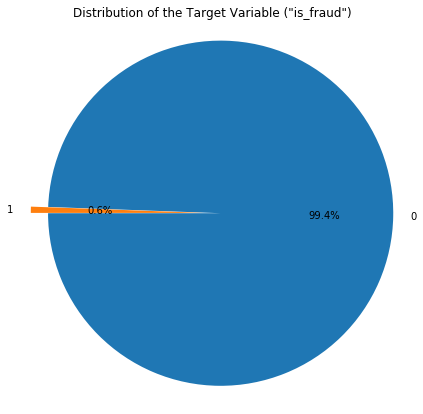

In [8]:
# Calculate the value counts of the target variable
tr_data = train_data['is_fraud'].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))  # Adjust the figure size as needed
plt.pie(tr_data, labels=tr_data.index, autopct='%1.1f%%', startangle=180, explode=(0.1, 0))
plt.title("Distribution of the Target Variable (\"is_fraud\")")
plt.axis('equal')
plt.show()

In [9]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [10]:
#For non fraud transactions only 
print('Statistics of non-fraudulent transactions:')
non_fraud_data = train_data[train_data['is_fraud'] == 0]
non_fraud_data.describe()

Statistics of non-fraudulent transactions:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1.289169e+06,1289169.0
mean,6.484732e+05,4.172901e+17,6.766711e+01,4.880511e+04,3.853689e+01,-9.022814e+01,8.877523e+04,1.349249e+09,3.853666e+01,-9.022827e+01,0.0
std,3.741526e+05,1.308990e+18,1.540080e+02,2.689099e+04,5.075234e+00,1.375598e+01,3.018065e+05,1.283514e+07,5.109144e+00,1.376794e+01,0.0
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.0
25%,3.246100e+05,1.800429e+14,9.610000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338759e+09,3.473145e+01,-9.689853e+01,0.0
50%,6.484110e+05,3.521417e+15,4.728000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349254e+09,3.936528e+01,-8.744091e+01,0.0
75%,9.723990e+05,4.642255e+15,8.254000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359378e+09,4.195705e+01,-8.023853e+01,0.0
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.568990e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.668291e+01,-6.695090e+01,0.0


In [11]:
#For fraud transactions only 
print('Statistics of fraudulent transactions:')
fraud_data = train_data[train_data['is_fraud'] == 1]
fraud_data.describe()

Statistics of fraudulent transactions:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,7.506000e+03,7.506000e+03,7506.000000,7506.000000,7506.000000,7506.000000,7.506000e+03,7.506000e+03,7506.000000,7506.000000,7506.0
mean,6.249497e+05,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,9.727676e+04,1.348389e+09,38.653901,-89.915808,1.0
std,4.010560e+05,1.276871e+18,390.560070,27265.558212,5.172289,14.278221,3.265815e+05,1.383020e+07,5.218387,14.298685,0.0
min,2.449000e+03,6.041621e+10,1.060000,1330.000000,20.027100,-165.672300,2.300000e+01,1.325466e+09,19.425114,-166.550779,1.0
25%,2.398565e+05,1.800429e+14,245.662500,24927.000000,35.056100,-96.701000,7.465000e+02,1.335744e+09,35.114671,-96.671038,1.0
50%,6.381620e+05,3.528041e+15,396.505000,46290.000000,39.433600,-86.691900,2.623000e+03,1.348872e+09,39.427008,-86.813044,1.0
75%,9.849215e+05,4.651007e+15,900.875000,71107.000000,42.073175,-79.941600,2.143700e+04,1.360021e+09,41.986902,-79.907096,1.0
max,1.295733e+06,4.992346e+18,1376.040000,99783.000000,66.693300,-68.556500,2.906700e+06,1.371787e+09,67.510267,-67.569238,1.0


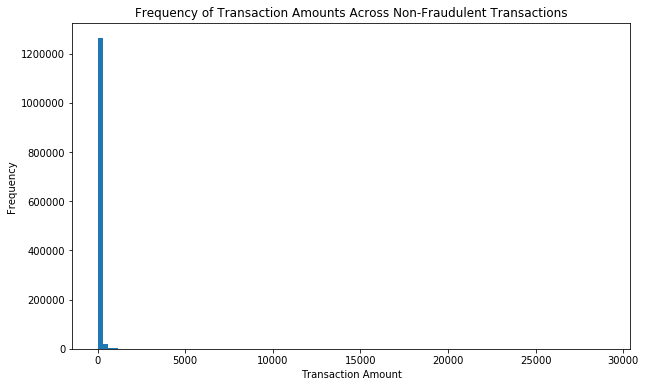

In [12]:
non_fraud_data = train_data[train_data.is_fraud == 0]
data = non_fraud_data['amt']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Transaction Amounts Across Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

#Graph shows that the majority of non-fraudulent transactions are clustered around small amounts

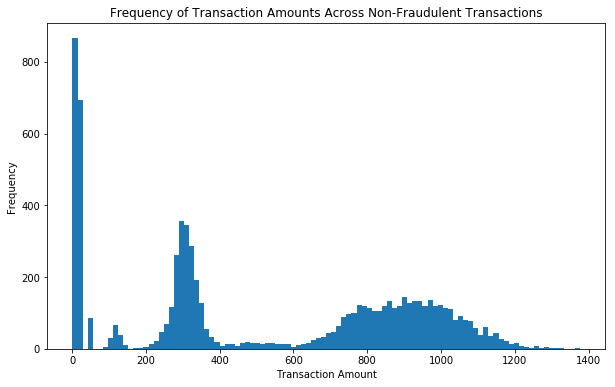

In [13]:
fraud_data = train_data[train_data.is_fraud == 1]
data = fraud_data['amt']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Transaction Amounts Across Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

#Graph shows that the majority of non-fraudulent transactions are clustered around small amounts

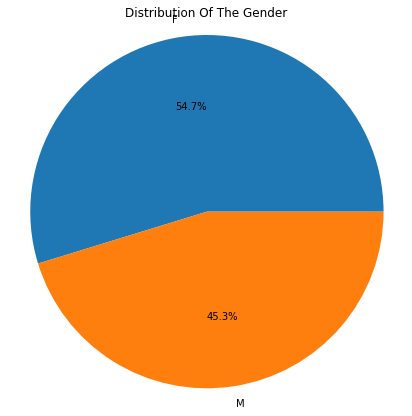

In [14]:
#Gender Distribution chart
data = train_data['gender'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Distribution Of The Gender")
plt.axis('equal')
plt.show()

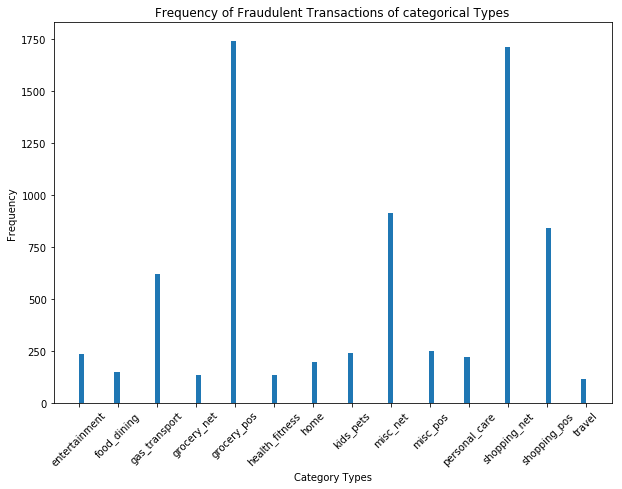

In [15]:
fraud_datas = train_data[train_data['is_fraud'] == 1]

data = fraud_datas['category']
plt.figure(figsize=(10, 7))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions of categorical Types')
plt.xlabel('Category Types')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

In [16]:
train_data.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True)
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


In [17]:
train_data.drop(columns=['lat','long','merch_lat','merch_long'],inplace=True)
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,4154,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,1939,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,99,Dance movement psychotherapist,1986-03-28,0


In [18]:
print(train_data.dtypes)

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
gender                    object
city                      object
zip                        int64
city_pop                   int64
job                       object
dob                       object
is_fraud                   int64
dtype: object


In [19]:
train_data['trans_date_trans_time'] = train_data['trans_date_trans_time'].astype(str)
train_data['trans_date_trans_time'] = train_data['trans_date_trans_time'].str[10:13] #hours

train_data['dob'] = train_data['dob'].astype(str)
train_data['dob'] = train_data['dob'].str[0:4]
train_data['dob'] = train_data['dob'].astype(int)
train_data['dob'] = 2020 - train_data['dob'] #the dataset has transacions up until no more than 2020
train_data = train_data.rename(columns={'dob': 'age'})

train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,age,is_fraud
0,00,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",32,0
1,00,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,42,0
2,00,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,4154,Nature conservation officer,58,0
3,00,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,1939,Patent attorney,53,0
4,00,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,99,Dance movement psychotherapist,34,0


In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_data["trans_date_trans_time"] = le.fit_transform(train_data["trans_date_trans_time"])
train_data["job"] = le.fit_transform(train_data["job"])
train_data["merchant"] = le.fit_transform(train_data["merchant"])
train_data["category"] = le.fit_transform(train_data["category"])
train_data["gender"] = le.fit_transform(train_data["gender"])

train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,age,is_fraud
0,0,2703186189652095,514,8,4.97,0,Moravian Falls,28654,3495,370,32,0
1,0,630423337322,241,4,107.23,0,Orient,99160,149,428,42,0
2,0,38859492057661,390,0,220.11,1,Malad City,83252,4154,307,58,0
3,0,3534093764340240,360,2,45.00,1,Boulder,59632,1939,328,53,0
4,0,375534208663984,297,9,41.96,1,Doe Hill,24433,99,116,34,0


In [21]:
train_data.drop(columns=['city'],inplace=True)
print(train_data.dtypes)

trans_date_trans_time      int64
cc_num                     int64
merchant                   int64
category                   int64
amt                      float64
gender                     int64
zip                        int64
city_pop                   int64
job                        int64
age                        int32
is_fraud                   int64
dtype: object


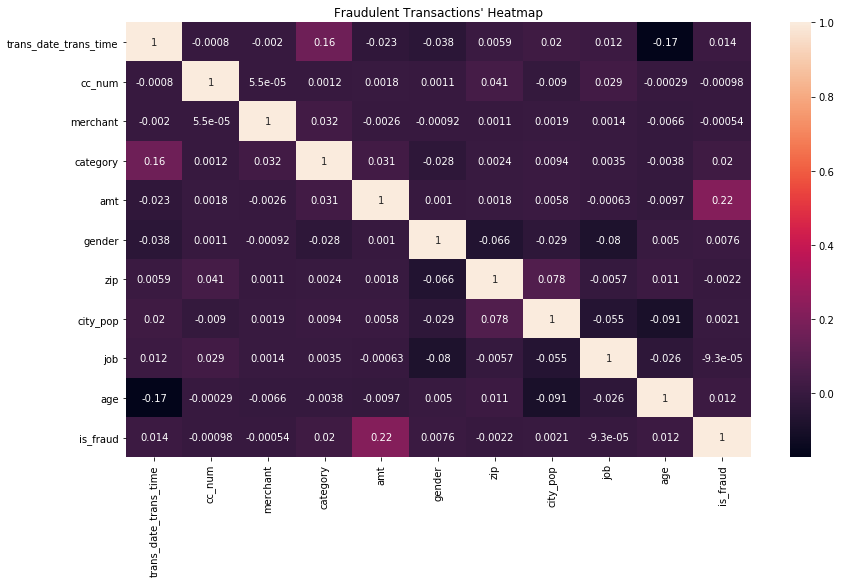

In [22]:
import seaborn as sns

train_data_test = train_data.corr() 
plt.figure(figsize=(14, 8))
sns.heatmap(train_data_test, annot=True)
plt.title("Fraudulent Transactions' Heatmap")
plt.show()

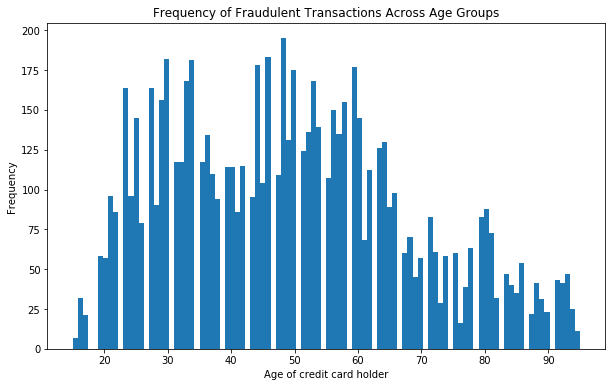

In [23]:
fraud_dataSet = train_data[train_data.is_fraud == 1]
data = fraud_dataSet['age']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions Across Age Groups')
plt.xlabel('Age of credit card holder')
plt.ylabel('Frequency')
plt.show()

In [24]:
def Plot_Auc_Roc_Curve(X_test, y_test):
    # Calculate ROC curve and AUC
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def calculate_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    auc_roc = roc_auc_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1, auc_roc

In [26]:
def print_evaluation_metrics(accuracy, precision, recall, f1, auc_roc):
    print('Test Accuracy:', accuracy)
    print('Test Precision:', precision)
    print('Test Recall:', recall)
    print('Test F1 Score:', f1)
    print('Test AUC ROC:', auc_roc)

In [27]:
def evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc):
    metrics = ["AUC ROC","Accuracy",  "F1 Score","Precision", "Recall"]
    values = [test_accuracy, test_precision, test_recall, test_f1, test_auc_roc]

    plt.figure(figsize=(8, 6))
    plt.bar(metrics, values, color='gold')
    plt.ylabel('Values')
    plt.xlabel('Evaluation Metrics')
    plt.title('Model Evaluation Metrics')

    for i, value in enumerate(values):
        plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

    plt.xticks(rotation=45) 

    plt.tight_layout()
    plt.show()

In [28]:
def show_confusion_matrix(y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [29]:
#Logistic Regression
from time import time
from sklearn.linear_model import LogisticRegression

X = train_data.drop(['is_fraud'],axis=1)
y = train_data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)


C:\Users\SEC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SEC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Test Accuracy: 0.9942121194593865
Test Precision: 0.49710605972969324
Test Recall: 0.5
Test F1 Score: 0.49854883026631525
Test AUC ROC: 0.5


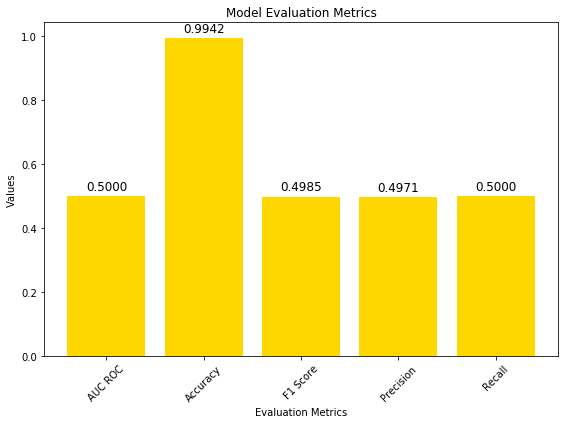

In [30]:
evaluation_metrics(test_auc_roc,test_accuracy,test_f1,test_precision, test_recall)

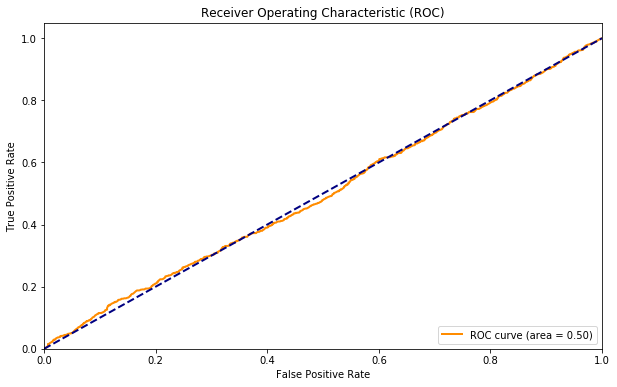

In [31]:
from sklearn.metrics import roc_curve, auc
Plot_Auc_Roc_Curve(X_test, y_test)

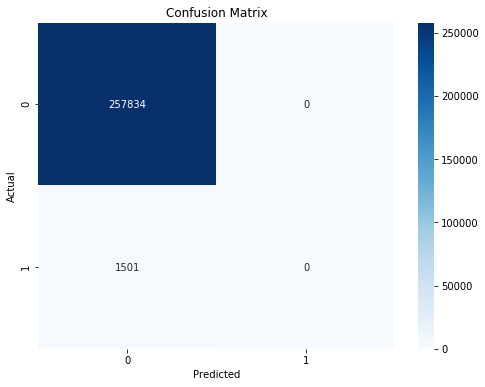

In [32]:
show_confusion_matrix(y_test, y_test_pred)

In [33]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

X = train_data.drop(columns='is_fraud',axis=1)
y = train_data['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)
model = tree.DecisionTreeClassifier(min_samples_split=2, max_depth=2, min_samples_leaf=2, random_state=42)
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.9954833253213986
Test Precision: 0.8871916310373085
Test Recall: 0.6533865219838231
Test F1 Score: 0.7191782566686453
Test AUC ROC: 0.6533865219838231
time:  2.977752685546875


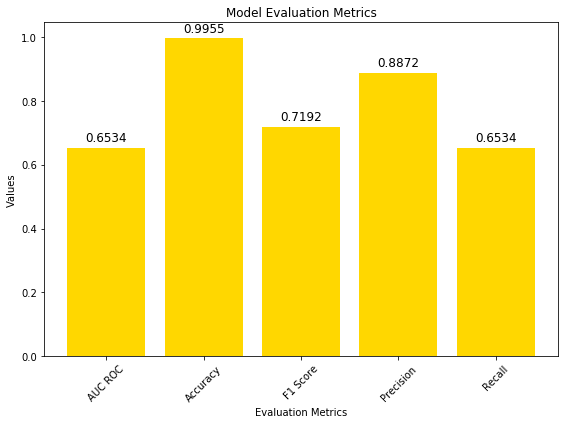

In [34]:
evaluation_metrics(test_auc_roc,test_accuracy,test_f1,test_precision, test_recall)

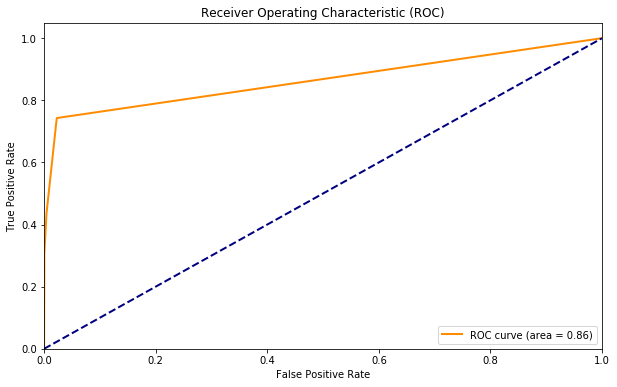

In [35]:
Plot_Auc_Roc_Curve(X_test, y_test)

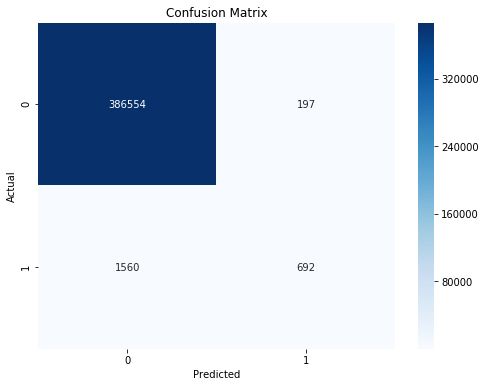

In [36]:
show_confusion_matrix(y_test, y_test_pred)

In [37]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

X = train_data.drop(columns='is_fraud',axis=1)
y = train_data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = RandomForestClassifier(n_estimators=300, max_depth=20,min_samples_split=2, min_samples_leaf= 1, random_state=42)

model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)


Test Accuracy: 0.9986169772469621
Test Precision: 0.9825191161436106
Test Recall: 0.8942360084785759
Test F1 Score: 0.9338822459090378
Test AUC ROC: 0.8942360084785759


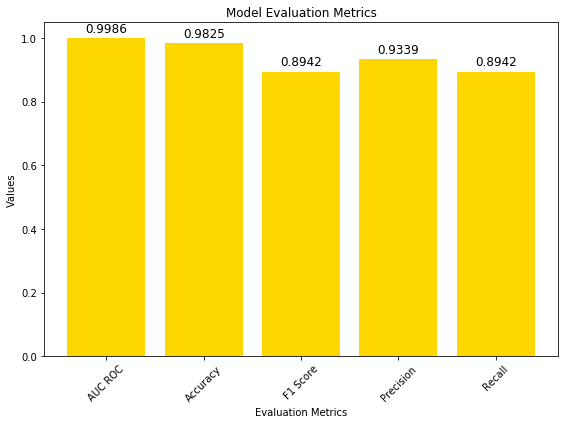

In [38]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

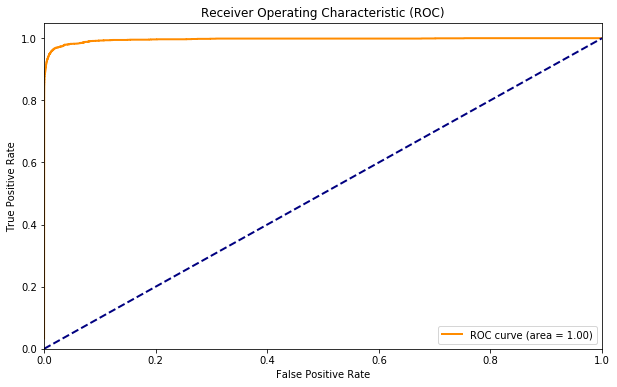

In [39]:
Plot_Auc_Roc_Curve(X_test, y_test)

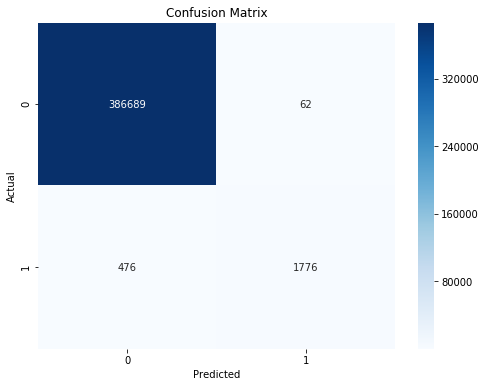

In [40]:
show_confusion_matrix(y_test, y_test_pred)